In [1]:
#task9

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

In [3]:
# Download necessary NLTK data
nltk.download('punkt')  # Tokenization
nltk.download('stopwords')  # Stop words

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sangheum\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sangheum\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
# Load dataset
df = pd.read_csv('TMDB_movie_dataset_v11.csv')

In [5]:
# Combine all movie overviews 
text = " ".join(df['overview'].astype(str))

In [6]:
# Handle missing values 
df['overview'] = df['overview'].fillna('')

In [7]:
# Text preprocessing 
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))  # Stopwords
    tokens = word_tokenize(text.lower())  # Tokenize and convert to lowercase
    tokens = [word for word in tokens if word.isalnum()]  # Keep only alphanumeric words
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return " ".join(tokens)

In [8]:
# Randomly sample 1% of the data
df = df.sample(frac=0.01, random_state=42)

In [9]:
# Preprocess text in overview column
df['processed_overview'] = df['overview'].apply(preprocess_text)

In [10]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=20, stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df['processed_overview'])

# Display top 20 TF-IDF features
print("Top 20 TF-IDF features:")
print(vectorizer.get_feature_names_out())

# Extract and average TF-IDF scores
tfidf_features = vectorizer.get_feature_names_out()
tfidf_scores = tfidf_matrix.mean(axis=0).A.flatten()
tfidf_df = pd.DataFrame({'word': tfidf_features, 'score': tfidf_scores})

# Sort and take top 10 TF-IDF features
top_tfidf = tfidf_df.nlargest(10, 'score')

Top 20 TF-IDF features:
['day' 'documentary' 'family' 'film' 'girl' 'home' 'life' 'like' 'love'
 'man' 'new' 'old' 'people' 'story' 'time' 'way' 'woman' 'world' 'years'
 'young']


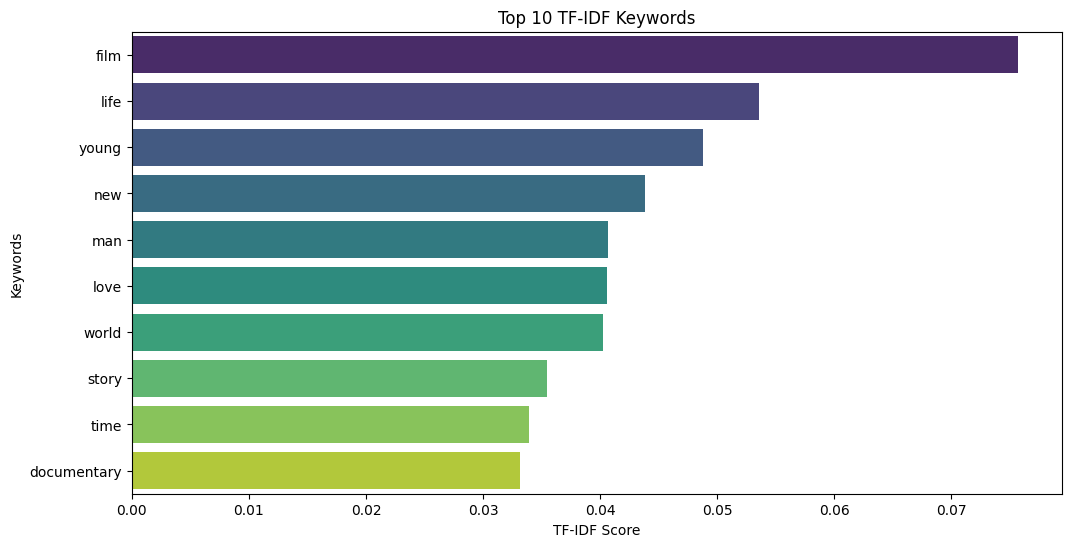

In [11]:
# Bar plot 
plt.figure(figsize=(12, 6))
sns.barplot(x='score', y='word', data=top_tfidf, hue='word', palette='viridis', legend=False)
plt.title('Top 10 TF-IDF Keywords')
plt.xlabel('TF-IDF Score')
plt.ylabel('Keywords')
plt.show()

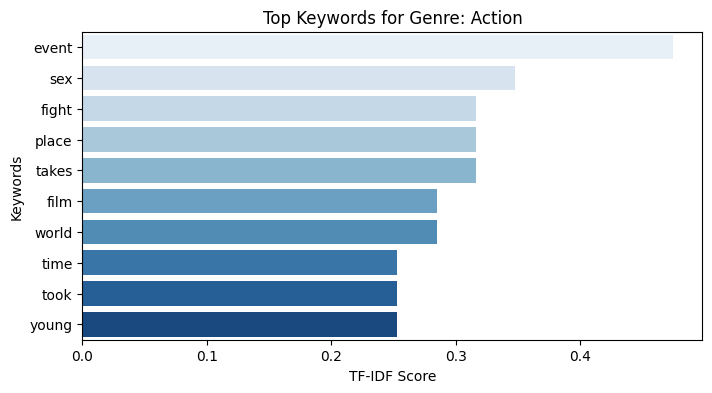

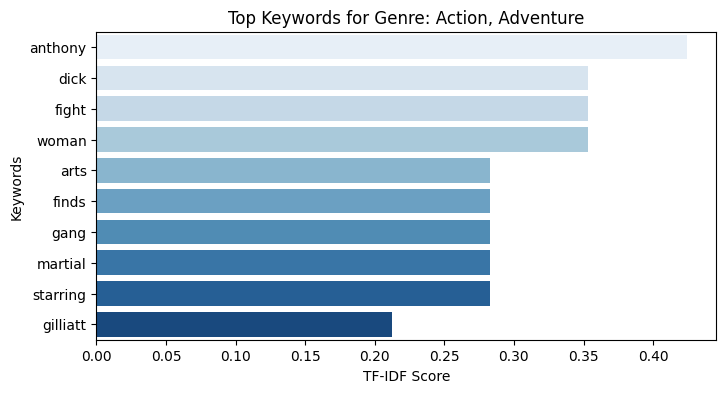

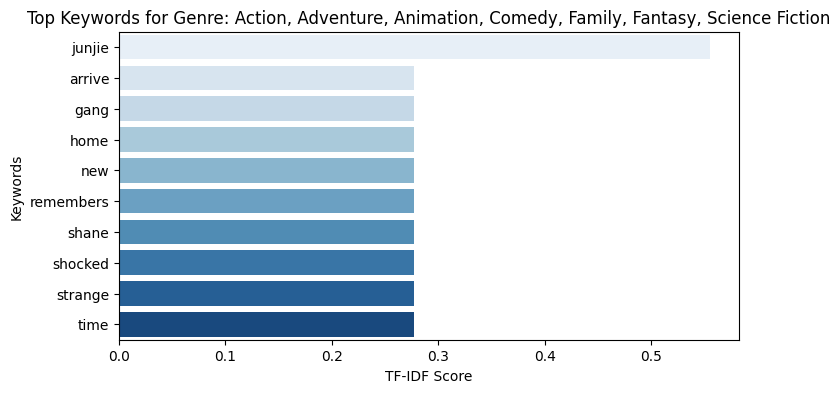

In [12]:
# Group overviews by genres
genre_keywords = df.groupby('genres')['processed_overview'].apply(
    lambda x: " ".join(x)
).reset_index()

# Select top 3 genres
top_genres = genre_keywords.head(3)

# TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=10, stop_words='english')

# Extract top keywords 
for _, row in top_genres.iterrows():
    genre = row['genres'] 
    overview_text = row['processed_overview']  # Combine overviews
    
    # Apply TF-IDF vectorization
    tfidf_matrix = vectorizer.fit_transform([overview_text])
    tfidf_features = vectorizer.get_feature_names_out()
    tfidf_scores = tfidf_matrix.toarray().flatten()
    
    tfidf_df = pd.DataFrame({
        'word': tfidf_features,
        'score': tfidf_scores
    }).sort_values(by='score', ascending=False)
    
    # Plot
    plt.figure(figsize=(8, 4))
    sns.barplot(x='score', y='word', data=tfidf_df, hue='word', palette='Blues', legend=False)
    plt.title(f'Top Keywords for Genre: {genre}')
    plt.xlabel('TF-IDF Score')
    plt.ylabel('Keywords')
    plt.show()
